## Import data and normalize

Normalize RPKM count data generated from ```0_download_data.R``` script.

In [3]:
import os
import sys
import pandas as pd
from sklearn import preprocessing
import umap
from plotnine import (ggplot, 
                      geom_point,
                      labs,
                      aes)
from numpy.random import seed
randomState = 123
seed(randomState)

sys.path.append("../../")
from functions import utils

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# Read in config variables
config_file = os.path.abspath(os.path.join(os.getcwd(),"../../configs", "config_Human_sample.tsv"))
params = utils.read_config(config_file)

In [2]:
# Load parameters
dataset_name = params["dataset_name"]

In [3]:
# Load arguments
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

rpkm_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "recount2_gene_RPKM_data.tsv")

In [4]:
# Output file
out_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "recount2_gene_normalized_data.tsv.xz")

In [5]:
# Read data
rpkm_data = pd.read_table(
    rpkm_data_file,
    header=0,
    sep='\t',
    index_col=0)

rpkm_data.head()
print(rpkm_data.shape)

(896, 58037)


In [6]:
# 0-1 normalize per gene
rnaseq_scaled_df = preprocessing.MinMaxScaler().fit_transform(rpkm_data)
rnaseq_scaled_df = pd.DataFrame(rnaseq_scaled_df,
                                columns=rpkm_data.columns,
                                index=rpkm_data.index).T

rnaseq_scaled_df.head()

,SRR592745,SRR592746,SRR592747,SRR592748,SRR592749,SRR933995,SRR933994,SRR933998,SRR933999,SRR934000,...,SRR1198838,SRR1198839,SRR1573494,SRR1573495,SRR1573496,SRR1573497,SRR1573498,SRR1573499,SRR1573500,SRR1573501
ENSG00000000003.14,0.818386,0.428429,0.527943,0.183543,0.254788,0.000000,0.000000,0.000983,0.000479,0.000036,...,0.024712,0.027917,0.085576,0.087287,0.075900,0.078148,0.069837,0.069690,0.067186,0.065334
ENSG00000000005.5,0.002542,0.001370,0.001268,0.049132,0.389071,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.371504,0.271765,0.002060,0.001355,0.001567,0.002483,0.000749,0.002168,0.001373,0.001655
ENSG00000000419.12,0.035576,0.049366,0.103888,0.048419,0.065743,0.008906,0.006984,0.002792,0.003661,0.001792,...,0.075620,0.070514,0.129299,0.130169,0.136667,0.144336,0.126444,0.136657,0.145748,0.139800
ENSG00000000457.13,0.011681,0.005159,0.005841,0.010450,0.009432,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062158,0.055515,0.010599,0.010170,0.007938,0.007904,0.014556,0.014969,0.009099,0.008885
ENSG00000000460.16,0.007931,0.006460,0.006026,0.012363,0.014500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.108390,0.111998,0.068529,0.069808,0.033673,0.036412,0.079063,0.079971,0.037270,0.037609


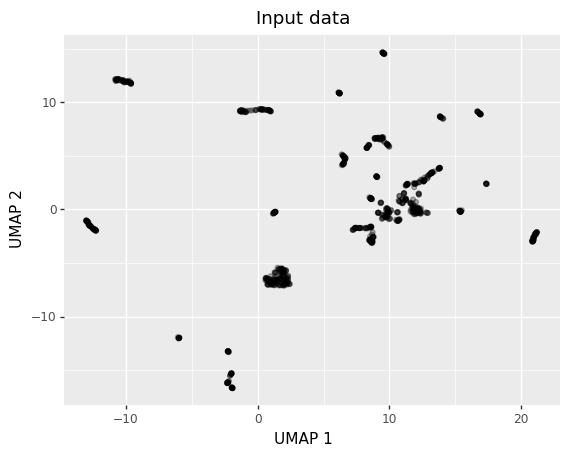

<ggplot: (8746738582476)>


In [7]:
# UMAP embedding of original input data
model = umap.UMAP(random_state=randomState).fit(rnaseq_scaled_df.T)

input_data_UMAPencoded = model.transform(rnaseq_scaled_df.T)
input_data_UMAPencoded_df = pd.DataFrame(data=input_data_UMAPencoded,
                                         index=rnaseq_scaled_df.T.index,
                                         columns=['1','2'])


g_input = ggplot(input_data_UMAPencoded_df, aes(x='1',y='2')) \
    + geom_point(alpha=0.3) \
    + labs(x = "UMAP 1", y = "UMAP 2", title = "Input data") \

print(g_input)

In [8]:
# Save scaled data
rnaseq_scaled_df.to_csv(out_data_file, sep='\t', compression='xz')